In [195]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
citydata = pd.read_csv(city_data_to_load)
ridedata = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
jtable = pd.merge(citydata, ridedata, on='city')

In [196]:
# Display the data table for preview
jtable.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

In [197]:
rural = jtable.loc[jtable['type'] == 'Rural', :]
# rural.head()

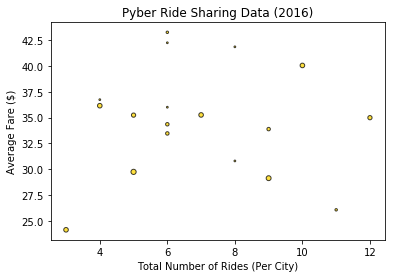

In [198]:
# Build the scatter plots for each city types

rxaxis = rural.groupby(['city'])['ride_id'].count()
ryaxis = rural.groupby(['city'])['fare'].mean()
rsizer = rural.groupby(['city'])['driver_count'].max()*3
rplot = plt.scatter(rxaxis, ryaxis, marker="o", facecolors="gold", edgecolors="black",
             s=rsizer, alpha=0.75)
title = plt.title('Pyber Ride Sharing Data (2016)')
ylabel = plt.ylabel('Average Fare ($)')
xlabel = plt.xlabel('Total Number of Rides (Per City)')

In [199]:
suburb = jtable.loc[jtable['type'] == 'Suburban', :]
suburb.head()

,city,driver_count,type,date,fare,ride_id
1625,Port Shane,7,Suburban,2018-04-09 15:34:40,27.66,4022340141966
1626,Port Shane,7,Suburban,2018-04-23 16:05:47,42.26,8341982666719
1627,Port Shane,7,Suburban,2018-03-02 12:06:00,14.95,2803204948363
1628,Port Shane,7,Suburban,2018-03-26 04:33:30,19.03,6010401984537
1629,Port Shane,7,Suburban,2018-03-15 12:09:42,31.58,2552978514662


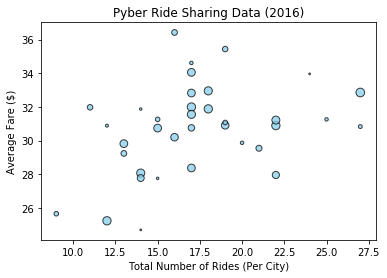

In [200]:
# Build the scatter plots for each city types
sxaxis = suburb.groupby(['city'])['ride_id'].count()
syaxis = suburb.groupby(['city'])['fare'].mean()
ssizer = suburb.groupby(['city'])['driver_count'].max()*3
splot = plt.scatter(sxaxis, syaxis, marker="o", facecolors="skyblue", edgecolors="black",
             s=ssizer, alpha=0.75)
title = plt.title('Pyber Ride Sharing Data (2016)')
ylabel = plt.ylabel('Average Fare ($)')
xlabel = plt.xlabel('Total Number of Rides (Per City)')

In [201]:
urban = jtable.loc[jtable['type'] == 'Urban', :]
# urban.head()

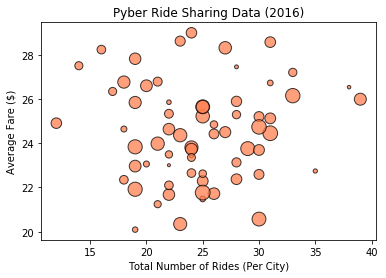

In [202]:
# Build the scatter plots for each city types
uxaxis = urban.groupby(['city'])['ride_id'].count()
uyaxis = urban.groupby(['city'])['fare'].mean()
usizer = urban.groupby(['city'])['driver_count'].max()*3
uplot = plt.scatter(uxaxis, uyaxis, marker="o", facecolors="coral", edgecolors="black",
             s=usizer, alpha=0.75)
title = plt.title('Pyber Ride Sharing Data (2016)')
ylabel = plt.ylabel('Average Fare ($)')
xlabel = plt.xlabel('Total Number of Rides (Per City)')

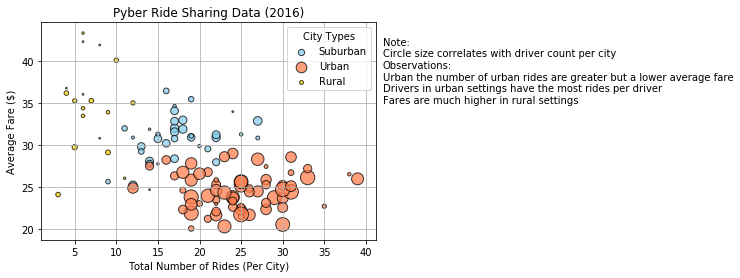

In [203]:
# Build the scatter plots for each city types
splot = plt.scatter(sxaxis, syaxis, marker="o", facecolors="skyblue", edgecolors="black", s=ssizer, linewidths =1,
                    alpha=0.75, label='Suburban')
uplot = plt.scatter(uxaxis, uyaxis, marker="o", facecolors="coral", edgecolors="black", s=usizer, linewidths =1,  
                    alpha=0.75, label='Urban')
rplot = plt.scatter(rxaxis, ryaxis, marker="o", facecolors="gold", edgecolors="black", s=rsizer, linewidths =1,
                    alpha=0.75, label='Rural')

# Incorporate the other graph properties
title = plt.title('Pyber Ride Sharing Data (2016)')
ylabel = plt.ylabel('Average Fare ($)')
xlabel = plt.xlabel('Total Number of Rides (Per City)')
plt.grid()

# Incorporate a text label regarding circle size
textbox = 'Note:\nCircle size correlates with driver count per city\nObservations:\nUrban the number of urban rides are greater but a lower average fare\nDrivers in urban settings have the most rides per driver\nFares are much higher in rural settings'
plt.text(42, 35, textbox, fontsize=10)

# Create a legend
plt.legend(title='City Types')

# Save Figure
plt.savefig("PyberScatter.png")
plt.show()

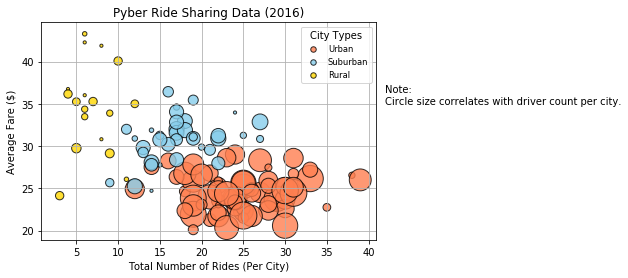

In [3]:
#LEAVE BLANK
# Show plot
# Plot Titles, Axes Labels, Legend Labels,

## Total Fares by City Type

In [204]:
# jtable.head()

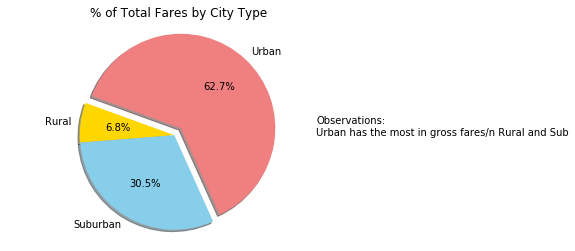

In [205]:
# Calculate Type Percents
pdata = jtable.groupby('type')['fare'].sum()
pdata

# Build Pie Chart
labels = 'Rural', 'Suburban', 'Urban'
colors = ['Gold', 'skyblue', 'lightcoral']
explode = (0, 0, 0.1)

plt.pie(pdata, 
    explode=explode, 
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',
    shadow=True,
    startangle=160,
    counterclock=True)

plt.title('% of Total Fares by City Type')
plt.axis('equal')

textbox2 = 'Observations:\nUrban has the most in gross fares/n Rural and Sub'
plt.text(1.5, 0, textbox2, fontsize=10)

plt.savefig("FarePie.png")
plt.show()
# Save Figure


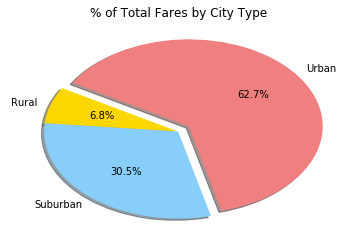

In [4]:
#LEAVE BLANK
# Show Figure
# When making your Pie Chart, experiment with effects like shadow, startangle, and explosion.
#You must include a written description of three observable trends based on the data.
You must use proper labeling of your plots, 
including aspects like: Plot Titles, Axes Labels, Legend Labels, Wedge Percentages, and Wedge Labels.
plt.show()

## Total Rides by City Type

In [206]:
# jtable.head()

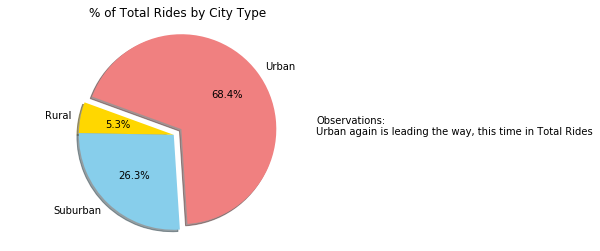

In [207]:
# Calculate Type Percents
rdata = jtable.groupby('type')['ride_id'].count()

# Build Pie Chart
labels = 'Rural', 'Suburban', 'Urban'
colors = ['Gold', 'skyblue', 'lightcoral']
explode = (0, 0, 0.1)

plt.pie(rdata, 
    explode=explode, 
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',
    shadow=True,
    startangle=160,
    counterclock=True)

plt.title('% of Total Rides by City Type')
plt.axis('equal')

textbox2 = 'Observations:\nUrban again is leading the way, this time in Total Rides'
plt.text(1.5, 0, textbox2, fontsize=10)

plt.savefig("RidePie.png")
plt.show()
# Save Figure


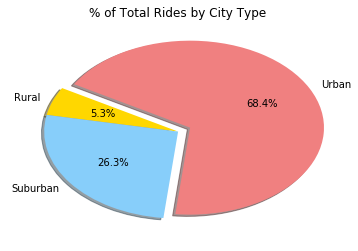

In [5]:
#LEAVE BLANK
# Show Figure
plt.show()

## Total Drivers by City Type

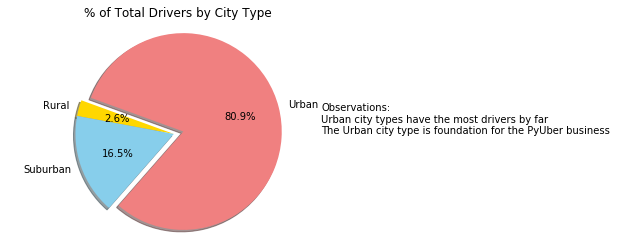

In [208]:
ddata = citydata.groupby(['type'])['driver_count'].sum()

# Build Pie Chart
labels = 'Rural', 'Suburban', 'Urban'
colors = ['Gold', 'skyblue', 'lightcoral']
explode = (0, 0, 0.1)

plt.pie(ddata, 
    explode=explode, 
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',
    shadow=True,
    startangle=160,
    counterclock=True)

plt.title('% of Total Drivers by City Type')
plt.axis('equal')

textbox3 = 'Observations:\nUrban city types have the most drivers by far\nThe Urban city type is foundation for the PyUber business'
plt.text(1.5, 0, textbox3, fontsize=10)

plt.savefig("DriverPie.png")
plt.show()


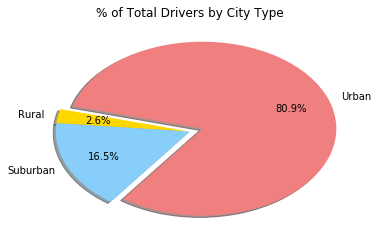

In [6]:
#LEAVE BLANK
# Show Figure
plt.show()